# GR5242 HW01 Problem 1: Basics

**Instructions**: This problem is an individual assignment -- you are to complete this problem on your own, without conferring with your classmates.  You should submit a completed and published notebook to Courseworks; no other files will be accepted.

**Description**: The goal of this problem is to get your familiar with neural network training from end to end. 

Our main tool is `tensorflow`, especially [`tensorflow.keras`](https://www.tensorflow.org/api_docs/python/tf/keras), that helps us with model building and automatic differentiation / backpropagation. 

There are 4 questions in this notebook, including 3 coding quesitons and 1 text question. Each coding question expects 1~3 lines of codes, and the text question expects just 1 sentence of explanation. 

In [1]:
# TensorFlow and tf.keras: run this block first.
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.2


## Dataset

We will working on `mnist` dataset, which contain images of written digits of 0-9 and corresponding labels. 

In [2]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

By printing out the shapes, we see there are 60,000 training data and 10,000 test data. Each image is represented as a 28x28 matrix of pixel values, and each label is the corresponding digit. See illustration below. 

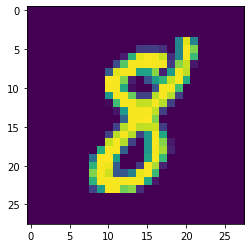

In [4]:
plt.imshow(train_images[41])

In [5]:
print(train_labels[41])

8


Let's rescale the image so that the pixel value is from 0 to 1. 

In [6]:
train_images = train_images / 255.0

test_images = test_images / 255.0

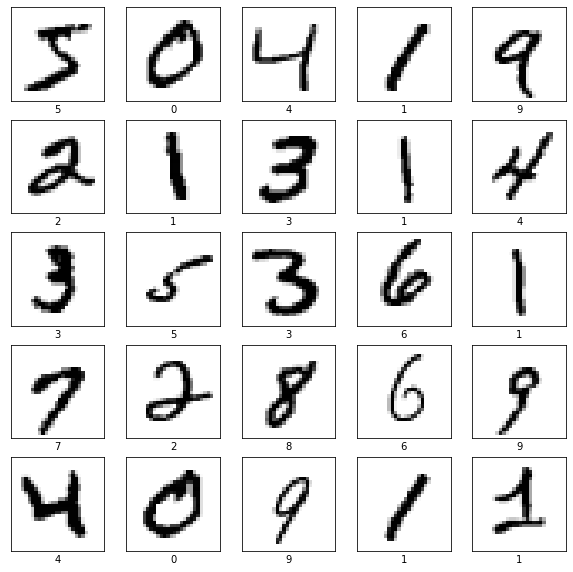

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

## Recap of classification task

In a classification task with $K$ classes, suppose the predicted logits for an image are $s_1, \cdots, s_K$. The predicted probabilities are then 

$$\hat p_i = \frac{\exp \{ s_i\}}{\sum_{j=1}^K \exp \{s_j\}}, \text{ for }i=1:K$$

The CrossEntropy (CE) loss is defined as 

$$CE = - \sum_{i=1}^K t_i \log (\hat p_i)$$ 

where $t_i=1$ if the image belongs to the $i$th class or otherwise $t_i=0$. 

## Model

Now, we will build a model to predict the logits of images for the classificaiton task. 

###  Question 1: Building the Model

[`tf.keras.model`](https://www.tensorflow.org/api_docs/python/tf/keras/Model) provides a high-level wrapper class for building neural networks. 

In the following, you need to fill in `tf.keras.Sequential()` to sequentially build up the neural network layers: 

-  a layer that flattens the image input from the shape `(28,28)` to the one-dimensional shape `(28*28,)`

- a fully-connected layer with hidden unit size `128` and followed by `relu` non-linearity (aka the activation function) 

- a output layer with hidden unit size `10` (note: do not apply non-linearity in the output layer). 

Here are some useful resources:

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense



In [8]:
model = tf.keras.Sequential([
    ### YOUR CODE HERE ###
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
    ######################
])

### Question 2: Compling the Model

When compling a `keras.model`, typically you need to specify the following three items: 

- optimizer: specifies a way to apply gradient descent update of model parameters. We will use the [`adam`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) optimizer with the default learning rate in this example. 

- loss: the objective function to minimize over. In classification task, the cross-entropy loss is used. 

- metrics: the metrics are used to __evaluate__ the current model's performaning (not for __training__). In classification task, the `accuracy` metric is typically used. 

Please fill in the `loss` in the following code. [Here](https://www.tensorflow.org/api_docs/python/tf/keras/losses/) is a list of availbale loss functions and their descriptions. 

Note: remember that the neural network outputs the `logits` instead of the class probabilities (why? answer the question below), and make sure to specify this in the `loss function`.


In [9]:
model.compile(optimizer='adam',
              ### YOUR CODE HERE ###
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              ######################
              metrics=['accuracy'])

### Question 3: The neural network specified above does not output class probabilities, ecause the last layer of the neural network is a linear layer which outputs value ranging from $(-\infty, \infty)$.  Your choice of loss function above should take care of that, but what _mathematical_ function maps these logit values to class probabilities?

#######################
###### YOUR ANSWER HERE

Denote $\alpha = (\alpha_1, \alpha_2, \cdots, \alpha_d)$ as the logit values, where $d$ is the number of units. Denote the corresponding probability values as $p=(p_1, p_2, \cdots, p_d)$. Then the mathematical function that maps logit values to class probabilities is: 

$$p_i = \frac{\exp \{\alpha_i\}}{\sum_{j=1}^i \exp \{\alpha_j\}}, \qquad i=1,\cdots, d$$

#######################

## Training

Now let's train the model for 10 epochs. By the end of the training, you should expect an accuracy above 0.99. 

In [10]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2563 - accuracy: 0.9268
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1137 - accuracy: 0.9662
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0790 - accuracy: 0.9767
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0581 - accuracy: 0.9828
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0463 - accuracy: 0.9857
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0362 - accuracy: 0.9886
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0288 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0231 - accuracy: 0.9933
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0193 - accuracy: 0.9939
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.016

## Test Evaluation

Finally, we evaluate our model on the test set. You could expect the test accuracy to be slightly lower than the training accuracy. 

In [11]:
test_loss, test_acc = model.evaluate(test_images,  test_labels)

print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0773 - accuracy: 0.9789

Test accuracy: 0.9789000153541565


### Make Prediction

#### Question 4: fill in the following code block to make predictions on test images. The results should be stored in `predicted_labels`. 

In [12]:
### YOUR CODE HERE ###
# solution 1
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predicted_labels = predictions.argmax(axis=1)
# solution 2
predicted_logits = model.predict(test_images) 
predicted_labels = predicted_logits.argmax(axis=1)
#####################

You can verify your prediction by comparing its accuracy to the test accuracy calculated above -- they should be the same. 

In [13]:
test_acc2 = (predicted_labels == test_labels).sum() /test_labels.shape[0]
assert (test_acc2 - test_acc) < 1e-3